## 1. Bagging ensemble:

In [1]:
# Install once.
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

### 1.1. Read in data:

In [3]:
# Load data.
data = load_breast_cancer()

In [4]:
#설명변수
X = data['data']
variable_names = data['feature_names']
print(variable_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
X.shape

(569, 30)

In [6]:
#반응변수
#0은 양성, 1은 악성이 되도록 레이블 다시 지정
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

### 1.2. Random Forest:

In [8]:
# Classification by Random Forest.
RFC = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=2,random_state=123)
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)
print( "Random Forest accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest accuracy : 0.924


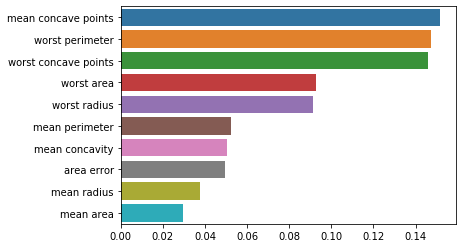

In [9]:
# Display the top 10 most important variables.
variable_importance = pd.Series(RFC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#변수 중에서 중요하다는 순위대로 나타내줌

## 2. Boosting Ensemble:

### 2.1.  AdaBoost:

In [10]:
# Classification by AdaBoost.
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100,learning_rate=0.01,random_state=123)
ABC.fit(X_train, Y_train)
Y_pred = ABC.predict(X_test)
print( "AdaBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

AdaBoost accuracy : 0.924


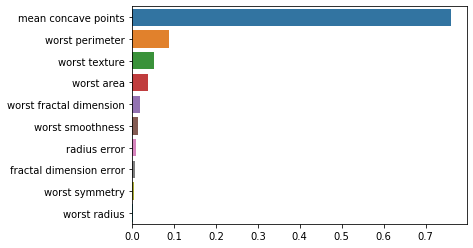

In [11]:
# Display the top 10 most important variables.
variable_importance = pd.Series(ABC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]  #탑 10만 그림
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#mean~이 제일 중요한 변수이다
#순위는 앞과 비슷하지만 mean이 압도적

### 2.2.  Gradient Boosting:

In [12]:
# Classification by Gradient Boosting.
GBC = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,min_samples_leaf=2,max_leaf_nodes=30,random_state=123)
GBC.fit(X_train, Y_train)
Y_pred = GBC.predict(X_test)
print( "Gradient Boosting accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))


#앞에서보다 성능이 저조해짐

Gradient Boosting accuracy : 0.906


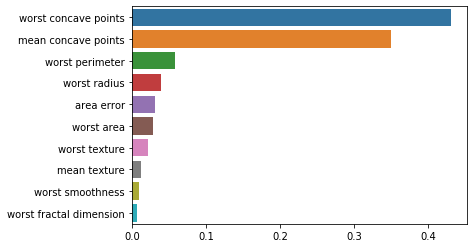

In [13]:
# Display the top 10 most important variables.
variable_importance = pd.Series(GBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#어떻게 유방암을 검출해내느냐
#worst~(모양)을 가장 많이 보고 한다는 뜻

### 2.3. XGBoost:

In [14]:
# Classification by XGBoost.
XGBC = XGBClassifier(n_estimator = 500, learning_Rate = 0.1, max_depth = 4, random_state=123)
XGBC.fit(X_train, Y_train)
Y_pred = XGBC.predict(X_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

#성능이 가장 좋음(데이터만 가지고 유방암 판별을 94%할 수 있다는 뜻)

XGBoost accuracy : 0.942


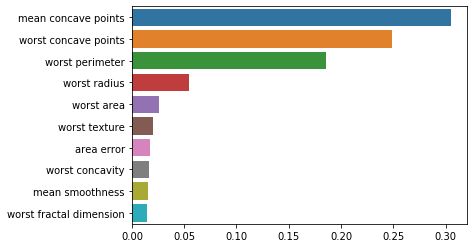

In [15]:
# Display the top 10 most important variables.
variable_importance = pd.Series(XGBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()



NOTE: The hyperparameters of XGBClassifier can be optimized using GridSearchCV() and RandomSearchCV(). Students are encouraged to explore. 